# **Google playstore App Data**

#### **Complete Exploratory Data Analysis🔎**

---
**Author:** `Syed Ghazi Ali Zaidi`

* Contact: _sghazializaidi@gmail.com_
* Explore my code: _https://github.com/Ghazi-work_
* Connect with me: _https://www.linkedin.com/in/syed-ghazi-ali-zaidi-405931217_


---

# About the data 

This dataset delves into the world of Google Play Store apps, offering valuable insights for developers and anyone interested in the Android app landscape. 

## Data Overview

* **Attributes:** The dataset includes information like category, rating, size, installs, price, and more for each app.
* **Record Structure:** Each row represents a unique app with its corresponding attributes.

| Attribute | Data Type | Description |
|---|---|---|
| App | Object | Name of the app |
| Category | Object | Category of the app |
| Rating | Numeric | Average user rating of the app |
| Reviews | Numeric | Number of user reviews for the app |
| Size | Object | Size of the app in megabytes |
| Installs | Object | Number of times the app has been installed |
| Type | Object | Type of app (Free or Paid) |
| Price | Object | Price of the app (if it's a paid app) |
| Content Rating | Object | Age-based content rating of the app |
| Genres | object | Genre of the app |
| Last Updated | object | The date on which app was last updated |
| Current Ver | object | Current app version |
| Android Ver | object | Current android version |


## Motivation

While Apple App Store data is readily available, Google Play Store data often proves elusive. This dataset bridges that gap, allowing us to analyze app trends, user preferences, and potential market opportunities. Scraping Google Play Store data presented its own set of challenges due to its dynamic nature, making this resource even more valuable.

## Inspiration

The potential of this data is vast. Developers can leverage it to:

* Understand user behavior and preferences
* Optimize app strategies for better visibility and engagement
* Identify market gaps and opportunities
* Gain a competitive edge in the Android market

Researchers and enthusiasts can explore:

* App usage patterns across different categories and demographics
* Factors influencing app success and failure
* The evolution of the app ecosystem over time

## Acknowledgements

A huge thank you to the original data providers on [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps/) and the Google Play Store itself. Without their efforts, this valuable resource wouldn't be available.

Lastly, I want to thank my teacher [Dr. Aammar Tufail](https://github.com/AammarTufail) who taught us about EDA.


---

## **1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## **2. Loading Dataset and Exploring**

↪ Load the csv file from dataset folder in pandas dataframe.\
↪ Exploring data and generating observations for data wrangling.

In [2]:
df = pd.read_csv("Datasets\googleplaystore.csv")

↪ Excluding a row that is misplaced in the data and can cause issues.

In [3]:
# Create a new DataFrame excluding the identified row
df = df[df['App'] != 'Life Made WI-Fi Touchscreen Photo Frame']

* Viewing the first 5 rows of the data.

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


* Looking at the total rows and columns of the dataset.

In [5]:
print(f"There are a total of {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are a total of 10840 rows and 13 columns in the dataset.


* Looking at the datatypes of the features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


* Basic descriptive statistics on the data.

In [7]:
df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


### **Observations:** 
----
1. There are 10840 rows and 13 columns.
2. The columns in the dataset are:
    - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
3. There are only **2 columns** that are _numeric_ but when we analyze there are **5 columns** that can be _numeric_.  
4. The `'Size', 'Installs' and 'Price'` columns are needed to be transform into numeric.
----

## **3. Data Pre-processing**

↪ We'll transform these columns in numeric by first checking any missing values in these columns:\
a. **Size**\
b. **Installs**\
c. **Price**

### a. Size

* Checking any null values.

In [8]:
print(f"There are {df['Size'].isnull().sum()} missing values in `Size` column.")

There are 0 missing values in `Size` column.


* Checking the unique values in the `Size` column.

In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

* Checking the category wise value count.

In [10]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

### **Observations:** 
----
* The Size column has **0 missing values**.
* It can be observed that `Size` column has these characters that has to be removed:
    1. `Varies with device` has to be replaced with numpy `NA`.
    2. `M` which has to be replaced with empty space.
    3. `k` which has to be replaced with empty space and divided by **`1024`** in order to  convert it to MB.
* Lastly the column can be converted to float64.
----

* Total rows by default.

In [11]:
df['Size'].value_counts().sum()

10840

* `Varies with device` sum which will be numpy nan later.

In [12]:
df['Size'].loc[df['Size'] == 'Varies with device'].value_counts().sum()

1695

* Replacing `Varies with device` to numpy nan.

In [13]:
# Replacing `Varies with device` to numpy NA
df['Size'] = df['Size'].replace('Varies with device',np.nan)

* The null values shows that it's now nan

In [14]:
df['Size'].isnull().sum()

1695

* Handling `M` & `k` for Size column and converting it to float64

In [15]:
# Replaced with empty string
df['Size'] = df['Size'].str.replace('M', '')

# Getting those which contains k and then replacing k with empty string, later dividing it by 1024
for index, row in df.iterrows():
    if 'k' in str(row['Size']):
        # Replace 'k' with empty string before dividing
        df.at[index, 'Size'] = str(row['Size']).replace('k', '')
        df.at[index, 'Size'] = pd.to_numeric(df.at[index, 'Size']) / 1024

# Coverting Size to float64
df['Size'] = df['Size'].astype('float64')
# Displaying the data type
print(f"The datatype of Size is: {df['Size'].dtype}")


The datatype of Size is: float64


### b. Installs

* checking the null values

In [16]:
df['Installs'].isnull().sum()

0

In [17]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

## **Observations:**
----
1. There are **0 missing** values
2. The installs column has two characters `+` and `,` after replacing them, it can be converted to int64
----


* Replacing `+` and `,` with empty space

In [19]:
# Replacing +
df['Installs'] = df['Installs'].str.replace('+','')

# Replacing ,
df['Installs'] = df['Installs'].str.replace(',','')

# Converting Installs to int
df['Installs'] = df['Installs'].astype('int64')

# Displaying the data type
print(f"The datatype of Size is: {df['Installs'].dtype}")

The datatype of Size is: int64


### c. Price

* Checking null values

In [20]:
df['Price'].isnull().sum()

0

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
df['Price'].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

## **Observations:**
----
1. There are **0 missing** values
2. The `Price` column has only **1** characters `$`, after replacing it, `Price` can be converted to float64
----


In [23]:
# Replacing `$` with empty space
df['Price'] = df['Price'].str.replace('$','')

# Converting to float64
df['Price'] = df['Price'].astype('float64')

# Displaying the data type
print(f"The datatype of Price is: {df['Price'].dtype}")

The datatype of Price is: float64


* Description statistics to show 5 columns are now numeric

In [24]:
df.describe()

,Rating,Size,Installs,Price
count,9366.000000,9145.000000,1.084000e+04,10840.000000
mean,4.191757,21.516165,1.546434e+07,1.027368
std,0.515219,22.589084,8.502936e+07,15.949703
min,1.000000,0.008301,0.000000e+00,0.000000
25%,4.000000,4.900000,1.000000e+03,0.000000
50%,4.300000,13.000000,1.000000e+05,0.000000
75%,4.500000,30.000000,5.000000e+06,0.000000
max,5.000000,100.000000,1.000000e+09,400.000000


## **4. Handling Missing Values**

↪ In this section we'll handle the missing values in the dataset to get the correct insight from the data.


* Printing the number of missing values in each column.

In [25]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [26]:
# Percentage of each column missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Size              15.636531
Rating            13.597786
Current Ver        0.073801
Android Ver        0.018450
Type               0.009225
App                0.000000
Category           0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

In [27]:
# Total Missing values in the dataset
df.isnull().sum().sum()

3180

* Using heatmap to visualize missing values in the dataset 📊

<Axes: >

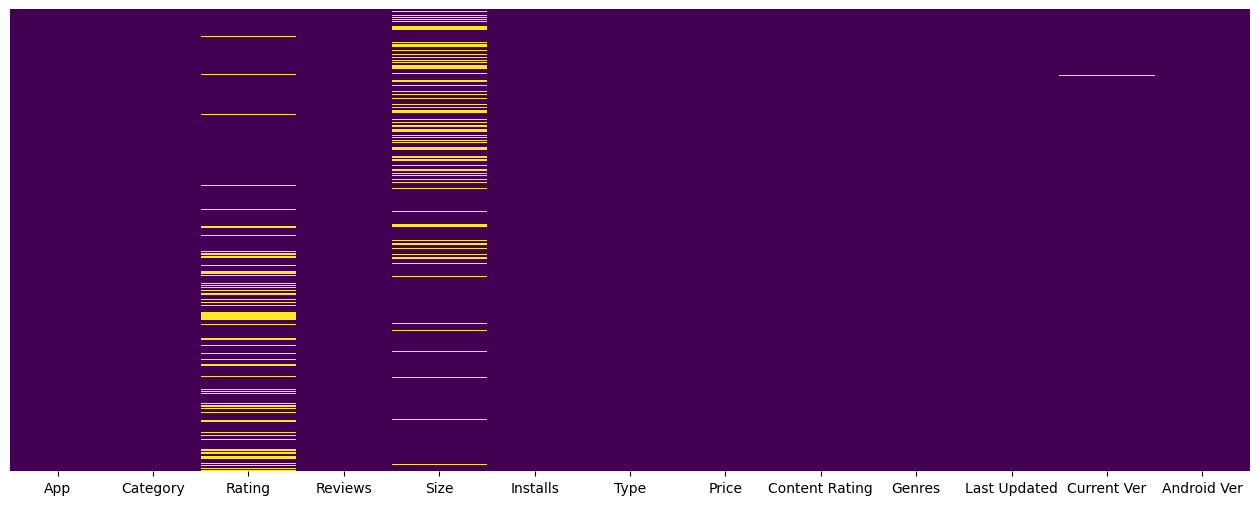

In [28]:
# Defining the figure size
plt.figure(figsize=(16,6))

# Using seaborn to make heatmap and providing missing values
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

#### → We need to visualize it with bar chart, to analyze more closely

Text(0.5, 1.0, 'Percentage of missing values in each column')

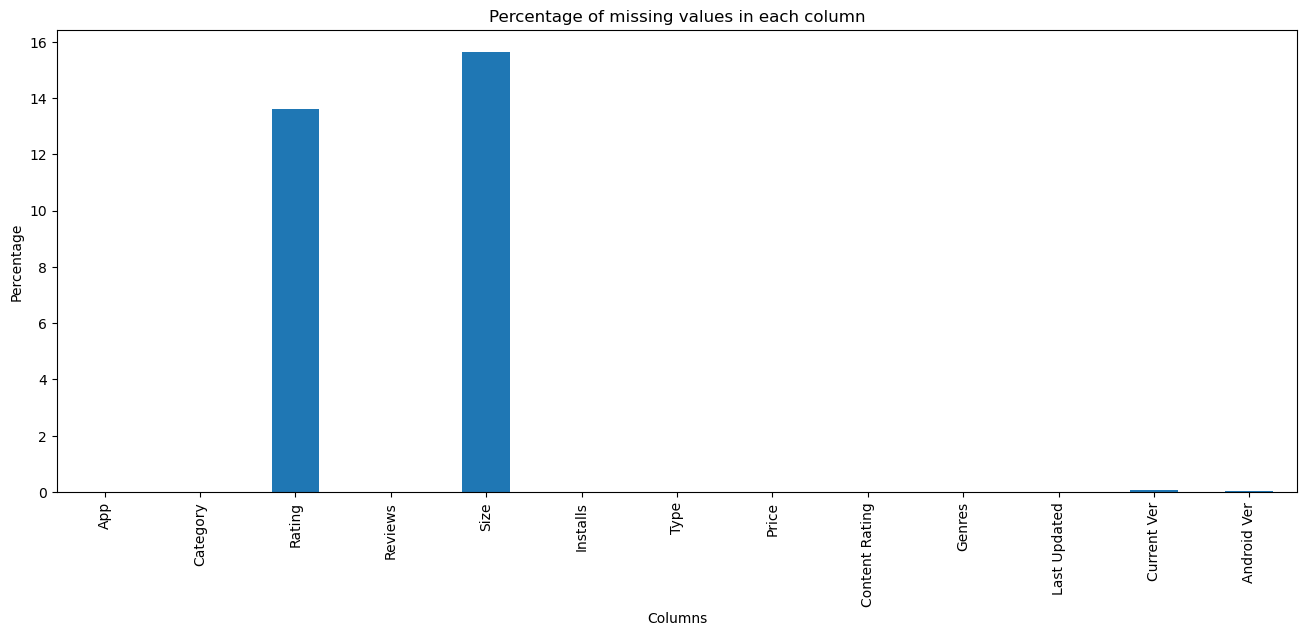

In [29]:
# Visualizing missing values as percentage
plt.figure(figsize=(16,6))

# Storing percentage of each missing values column
missing_percentage = df.isnull().sum() / len(df) * 100

# Plotting Bar chart
missing_percentage.plot(kind='bar')

# Adding labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

* Visualizing the columns which percentage is less than 1

<Axes: >

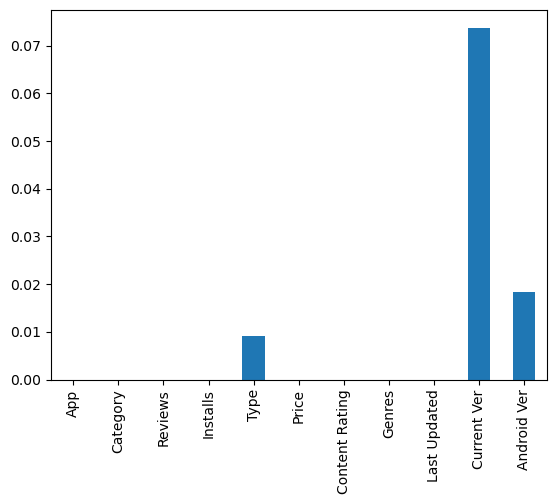

In [30]:
missing_percentage[missing_percentage < 1].plot(kind='bar')

## **Observations:**
----
1. There are total of **3180 missing values** which is `29.3%` of the dataset.
2. The `Size` column has  **1695** missing values, which is `15.6%` of the total values in the column.
3. The `Rating` column has  **1474** missing values, which is `13.59%` of the total values in the column.
4. These columns `Current Ver`, `Android Ver` and `Type` have less than **1%** missing values in their respective columns

#### Respective Steps that can be taken:
- We have to ignore the `Size` column as Nan was placed by us, against `Varies with Device`.
- The `Rating` column will be handled by checking the relationship with other variables like `Installs`, if relationship will be found it will be easy to impute.
- The columns having less than **1%** missing values will have their respective rows dropped.

#### Let's Have a Look!
----


In [31]:
df.describe()

,Rating,Size,Installs,Price
count,9366.000000,9145.000000,1.084000e+04,10840.000000
mean,4.191757,21.516165,1.546434e+07,1.027368
std,0.515219,22.589084,8.502936e+07,15.949703
min,1.000000,0.008301,0.000000e+00,0.000000
25%,4.000000,4.900000,1.000000e+03,0.000000
50%,4.300000,13.000000,1.000000e+05,0.000000
75%,4.500000,30.000000,5.000000e+06,0.000000
max,5.000000,100.000000,1.000000e+09,400.000000


* Visualizing Correlation

<Axes: >

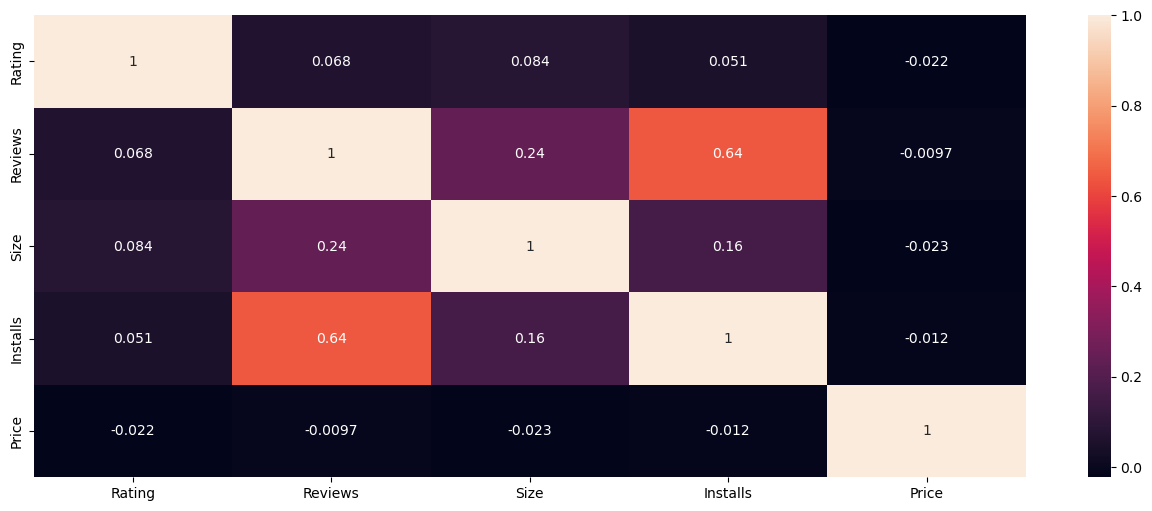

In [32]:
plt.figure(figsize=(16,6)) # Make figure size

# Gathering numberic columns
numeric_cols = ['Rating','Reviews','Size','Installs','Price']
sns.heatmap(df[numeric_cols].corr(), annot=True) # Plotting correlation matrix

#### Visualizing the correlation of Reviews with Installs

In [33]:
plt.figure(figsize=(16,6))

sns.boxplot(x=df['Installs'],y=np.log10(df['Reviews']) ,data=df)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log10 method

<Figure size 1600x600 with 0 Axes>

## **Observations:**
----
1. There is a strong relationship between `Installs` and `Reviews` of **0.64**
2. `Installs` and `Size` has positive relatioship of **0.16**
3. There is no **strong relationship** found for `Rating` with other variables.

- We'll consider `Installs` and would try to impute `Rating`.

----


In [ ]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

##### Checking the trend for Rating in each Installs_category

In [ ]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1279.0,4.171149,0.825307,1.0,3.8,4.4,4.8,5.0
Moderate,1442.0,4.035160,0.604533,1.4,3.8,4.2,4.5,5.0
More than moderate,1617.0,4.093197,0.505468,1.6,3.9,4.2,4.5,4.9
High,2115.0,4.207470,0.376423,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


#### The `Rating` will be imputed by mean in respect to the `Install` category it will fall in.


In [ ]:
# Total missing values in Rating column
df['Rating'].isnull().sum()

1474

In [ ]:
# Missing values in Rating column in respect to Installs_category 
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   882
Very low              454
Moderate               89
More than moderate     31
no                     15
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

In [ ]:
# Calculate mean values for each Installs_category
mean_ratings = df.groupby('Installs_category')['Rating'].mean()

# Impute missing values in Rating based on Installs_category mean
df['Rating'] = df.apply(lambda row: mean_ratings[row['Installs_category']] 
                        if pd.isnull(row['Rating']) else row['Rating'], axis=1)

print(f"There are {df['Rating'].isnull().sum()} missing values left in Rating")

There are 15 missing values left in Rating


In [ ]:
# Missing values in Rating column in respect to Installs_category 
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
no                    15
Very low               0
Low                    0
Moderate               0
More than moderate     0
High                   0
Very High              0
Top Notch              0
Name: count, dtype: int64

#### We'll drop these 15 as they had no Installs.
#### Secondly dropping those rows having less than 1% missing values.

In [ ]:
# remove the rows having null values less than 1%
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres','Rating'], inplace=True)

In [ ]:
# Checking final null values left
df.isnull().sum().sort_values(ascending=False)

Size                 1694
App                     0
Category                0
Rating                  0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

#### **Finally dropping duplicates from the dataframe**

In [ ]:
print(f"There are {df.duplicated().sum()} dublicated rows")
df.drop_duplicates(inplace=True)
print(f"There are {df.duplicated().sum()} dublicated rows after removing")

There are 483 dublicated rows
There are 0 dublicated rows after removing


## **6. Getting Insight 🔎**

----

## **6.1. How many apps are there in each category?**

In [ ]:
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

##### **Family** and **Game** are 2 categories having most apps.
##### Tools, Business and Medical are categories are among top.

## **6.2. Top 5 categories having highest number of Installs**

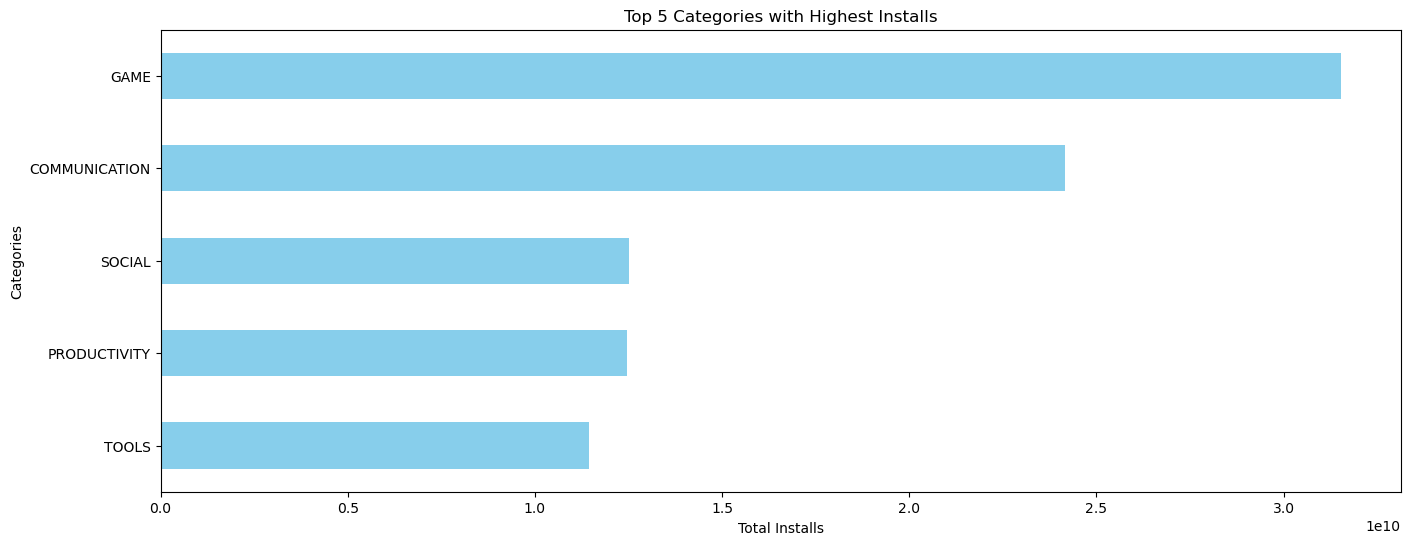

In [ ]:
top_5_category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)
top_5_category_installs = top_5_category_installs[::-1]

plt.figure(figsize=(16,6))
top_5_category_installs.plot(kind='barh', color='skyblue')
plt.title('Top 5 Categories with Highest Installs')
plt.xlabel('Total Installs')
plt.ylabel('Categories')
plt.show()

##### **Games** and **Communication** are among the top downloaded categories from the andriod store

## **6.3. What is the distribution of Rating?**

<Axes: xlabel='Rating', ylabel='Density'>

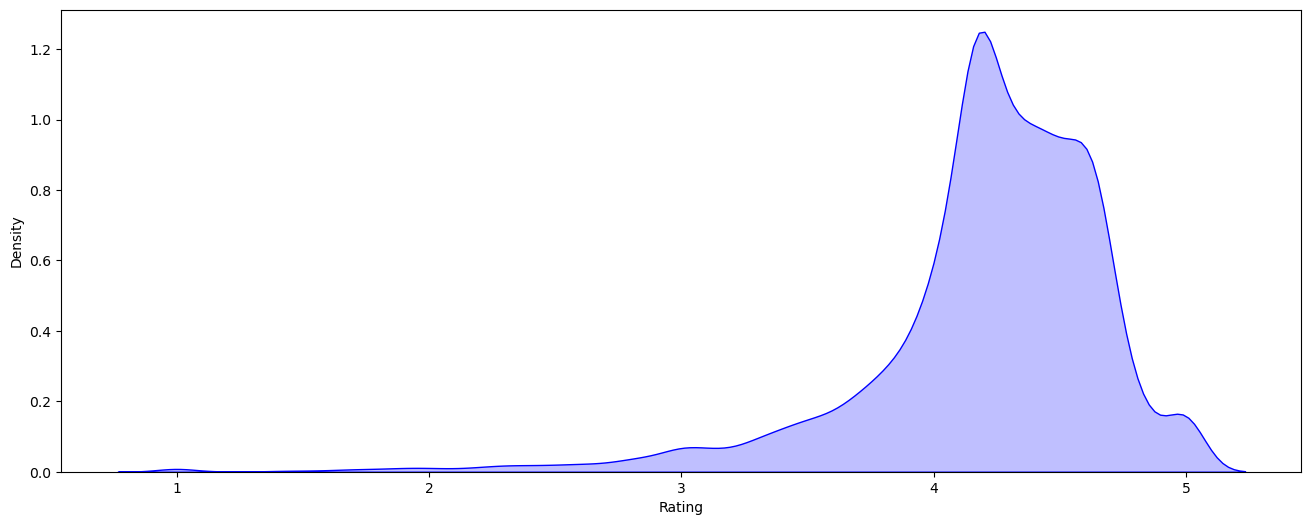

In [ ]:
plt.figure(figsize=(16,6))

sns.kdeplot(df['Rating'],color='blue',shade=True)

##### The apps are mostly rated **above 4** and less than **5**

## **6.4. Do larger apps tend to have higher ratings?**

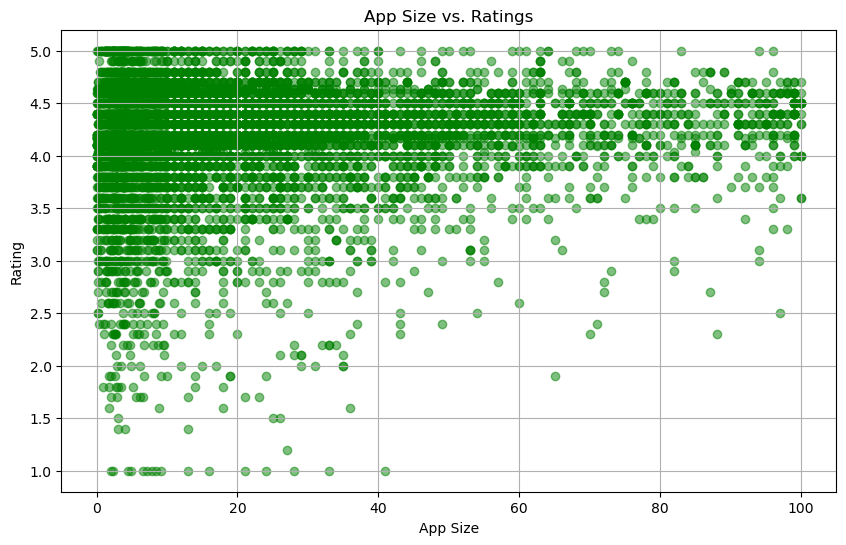

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['Size'], df['Rating'], alpha=0.5, color='green')
plt.title('App Size vs. Ratings')
plt.xlabel('App Size')
plt.ylabel('Rating')
plt.grid(True)

plt.show()

##### **larger size apps don't tend to have higher ratings**, smaller size apps shows more top rating achivement rather large size apps 

## **6.5. Impact on Installs as App Size increases**

Text(0.5, 1.0, 'Impact on App Installation as App size increases')

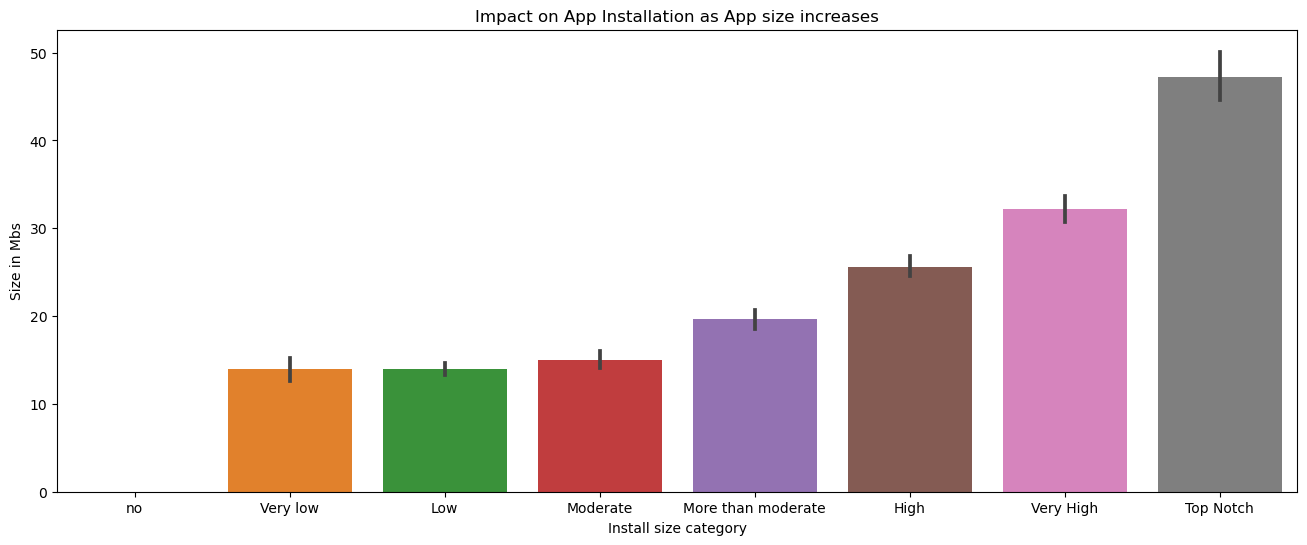

In [ ]:
plt.figure(figsize=(16,6))

sns.barplot(x='Installs_category',y='Size',data=df)
plt.xlabel('Install size category')
plt.ylabel('Size in Mbs')
plt.title('Impact on App Installation as App size increases')

##### The most downloaded/install app are once which **ranges in size between 40 to 50 MB** 

## **6.6. What is the distribution of app sizes?**

<Axes: xlabel='Size', ylabel='Density'>

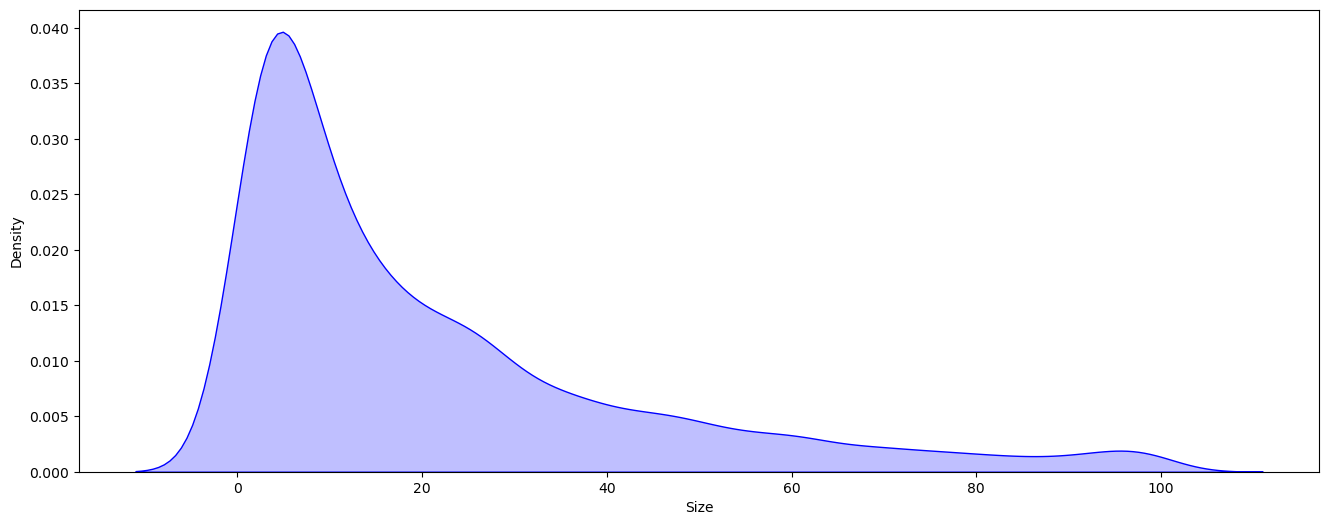

In [ ]:
plt.figure(figsize=(16,6))

sns.kdeplot(df['Size'],color='blue',shade=True)

##### App sizes are distributed towards **0 to 20 Mb size**

## **6.7. How many apps are free vs. paid?**

In [ ]:
print(f"There are {df['Type'].loc[df['Type'] == 'Free'].value_counts().sum()} free apps and {df['Type'].loc[df['Type'] == 'Paid'].value_counts().sum()} paid apps")


There are 9580 free apps and 752 paid apps


## **6.8. Do paid apps generally have higher ratings than free apps?**

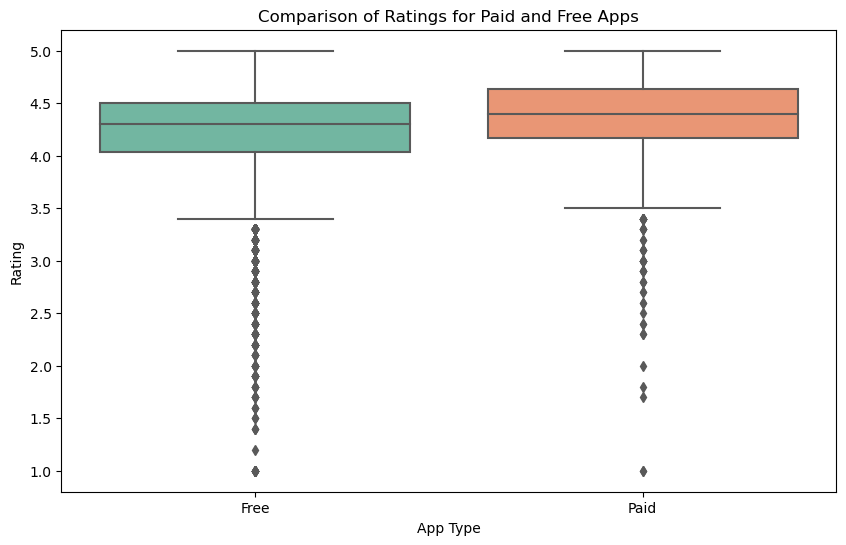

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating', data=df, palette='Set2')
plt.title('Comparison of Ratings for Paid and Free Apps')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

#### The graph shows that free apps tend to have lower ratings than paid apps.

## **6.9. What are the different content ratings present in the dataset?**

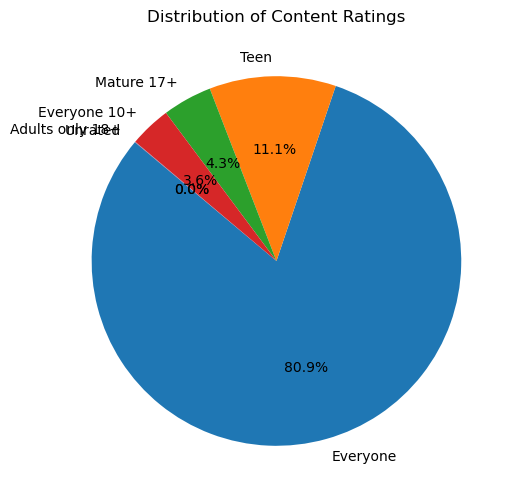

In [ ]:
plt.figure(figsize=(16, 6))

# Count the occurrences of each content rating
content_rating_counts = df['Content Rating'].value_counts()

# Plotting the pie chart
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Ratings')
plt.show()


#### Many content ratings are available among the top one is **Everyone**

## **6.10. Top 3 Highest Rated Apps**

<Axes: xlabel='App', ylabel='Reviews'>

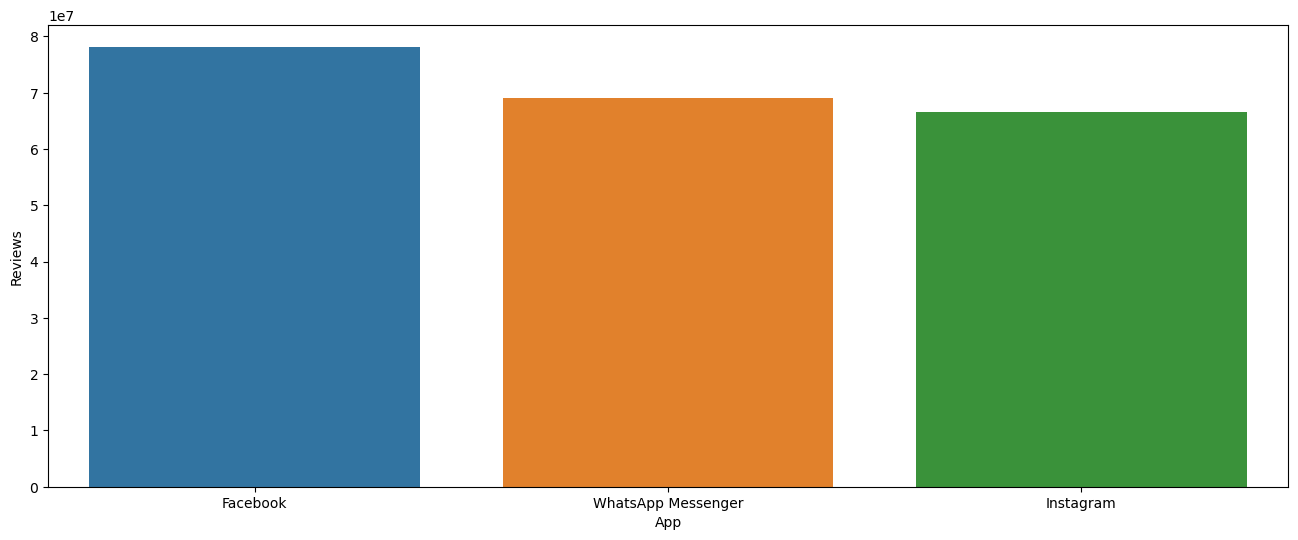

In [ ]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

## **Conclusion 🚀**
In this analysis of the Google Android app dataset, several key insights have been uncovered, shedding light on various aspects of app characteristics and user engagement. Below are the key findings:

### 1. App Categories and Installs 📱💻
The distribution of apps across different categories reveals that the "Game" category boasts the highest number of installs, followed by "Communication" and "Social" categories.
The top 5 categories with the highest number of installs are "Game," "Communication," "Social," "Productivity," and "Tools."
### 2. App Size and Ratings 📏⭐
A scatter plot depicting app size against ratings suggests that the majority of apps in the dataset are smaller in size. It can be seen that **larger size apps don't tend to have higher ratings**, smaller size apps shows more top rating achivement rather large size apps.
### 3. Free vs. Paid Apps 💸🆚
A box plot comparing the ratings of free and paid apps indicates that free apps tend to have lower ratings than paid apps. 

### 4. Content Ratings 🌐🎮
A pie chart displaying the distribution of content ratings demonstrates that the majority of apps target a general audience, falling under the "Everyone" category.

## **Recommendations and Future Work 🚀🔍**
- Consider further investigation into the relationship between app size and ratings. Additional statistical tests or machine learning models may provide more insights into potential patterns.
- Explore the impact of other factors, such as app price or specific genres, on user ratings and installations.
- Regularly update and expand the dataset to capture evolving trends in the dynamic landscape of Android apps.

Thankyou for reading this notebook!! 😄
